# Intramarket Differencing
https://www.youtube.com/watch?v=n2mY86S01fg


In [2]:
!pip install pandas_ta
!pip install mplfinance

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 281.4 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=bc629dfd315b6b0778a0809b2ed63558d4235bd187d72cf73859e3773a976845
  Stored in directory: /root/.cache/pip/wheels/29/62/bf/534dc7d55b3b792caea86974a64a27dc238c9ed38d99ad9cfb
Successfully built pandas_ta
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 273.5 kB/s eta 0:00:00a 0:00:01


In [2]:
# import os
# # Change the current working directory
# os.chdir("neurotrader888/IntramarketDifference")
# # Verify the change
# print("Current Working Directory:", os.getcwd())

Current Working Directory: /notebook/neurotrader888/IntramarketDifference


In [3]:
import os
# Filtering to show only files
print("Files in '", os.getcwd(), "':")
for item in os.listdir('.'):
    if os.path.isfile(item):
        print(item)

Files in ' /notebook/neurotrader/IntramarketDifference ':
BTCUSDT3600.csv
ETHUSDT3600.csv
bybit_prices_2017-2024.csv
README.md
R_neurotrader888_IntramarketDifference.ipynb
eth_btc_comparison.py
intermarket.py
py_neurotrader888_IntramarketDifference.ipynb
trades_from_signal.py


# BTC ETH neurotrader dataset

Prices tend to move together correlation of log returns is 0.839 from 2018-2023

Correlation 0.8394840622823707


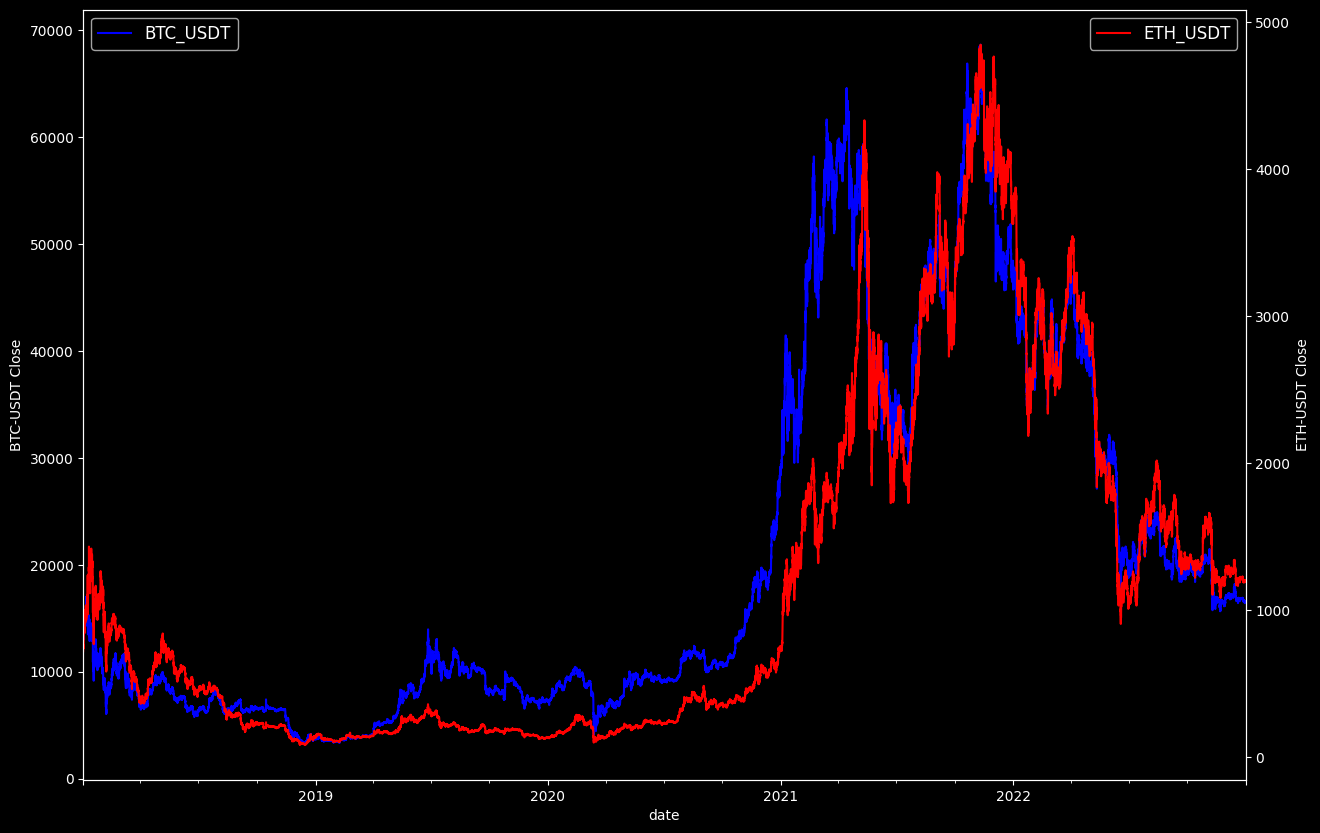

In [11]:
import pandas as pd
import numpy as np
import scipy
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf
plt.figure(figsize=(15, 10))  # You can adjust the numbers to fit your specific needs
plt.style.use('dark_background')

btc_data = pd.read_csv('BTCUSDT3600.csv')
btc_data['date'] = btc_data['date'].astype('datetime64[s]')
btc_data = btc_data.set_index('date')
btc_data = btc_data.dropna()
eth_data = pd.read_csv('ETHUSDT3600.csv')
eth_data['date'] = eth_data['date'].astype('datetime64[s]')
eth_data = eth_data.set_index('date')
eth_data = eth_data.dropna()

# df = pd.read_csv("bybit_prices_2017-2024.csv")
# btc_data = df[df['symbol'] == 'BTCUSDT'].copy()
# btc_data['date'] = pd.to_datetime(btc_data['date'])
# btc_data = btc_data.set_index('date')
# btc_data = btc_data.dropna()
# eth_data = df[df['symbol'] == 'ETHUSDT'].copy()
# eth_data['date'] = pd.to_datetime(eth_data['date'])
# eth_data = eth_data.set_index('date')
# eth_data = eth_data.dropna()

# Get log diff of eth and btc
eth_data['diff'] = np.log(eth_data['close']).diff()
btc_data['diff'] = np.log(btc_data['close']).diff()


# Plot cumulative sum of log returns for both btc and eth.
ax = plt.gca()
btc_data['close'].plot(color='blue', label='BTC_USDT', ax=ax)
ax2 = plt.twinx()
eth_data['close'].plot(color='red', label='ETH_USDT', ax=ax2)
ax.legend(loc='upper left', fontsize='large')
ax2.legend(loc='upper right', fontsize='large')
ax.set_ylabel("BTC-USDT Close")
ax2.set_ylabel("ETH-USDT Close")


print("Correlation", eth_data['diff'].corr(btc_data['diff']))
plt.show()


# BTC ETH RobotWealth dataset

Prices tend to move together correlation of log returns is 0.839 from 2018-2023

In [17]:
df = pd.read_csv("../../datasets/universe.csv")

Correlation 0.5955889811385374


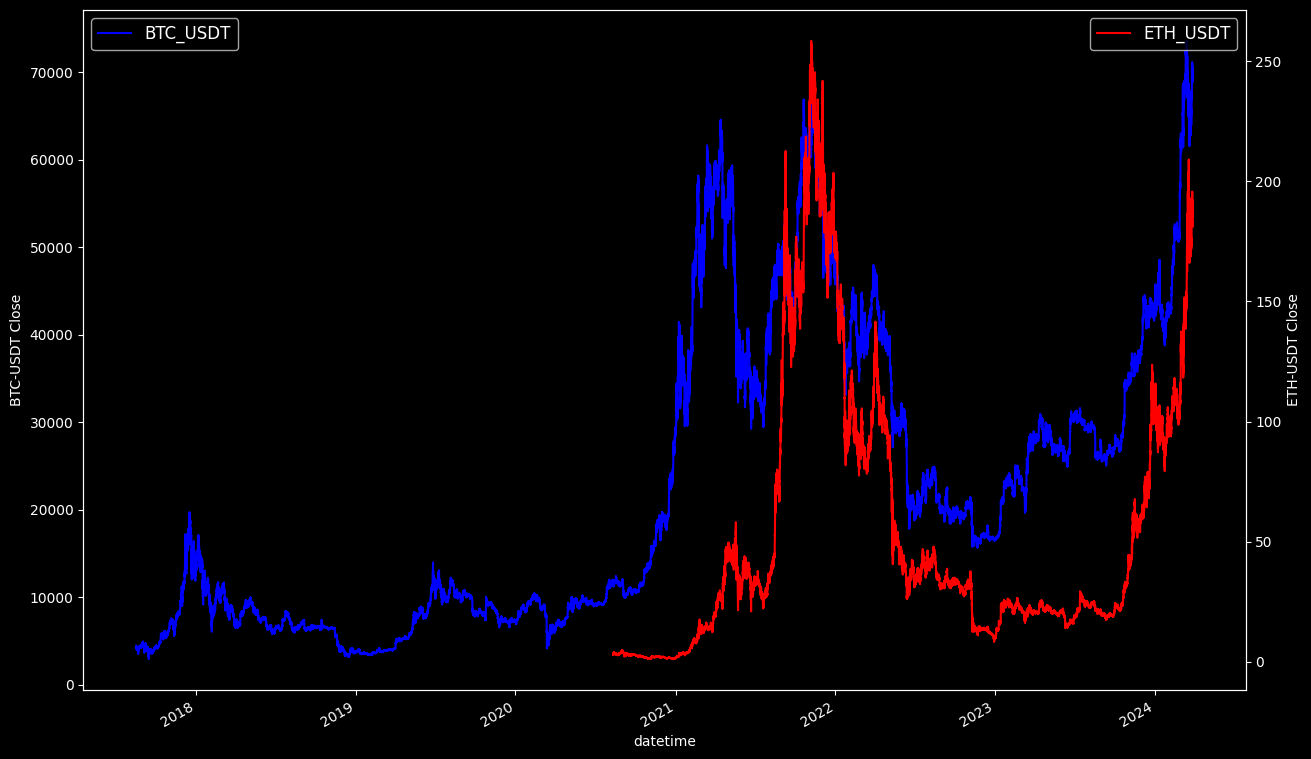

In [19]:
# df = pd.read_csv("bybit_prices_2017-2024.csv")
btc_data = df[df['ticker'] == 'BTCUSDT'].copy()
btc_data['datetime'] = pd.to_datetime(btc_data['datetime'], format="mixed")
btc_data = btc_data.set_index('datetime')
btc_data = btc_data.dropna()

eth_data = df[df['ticker'] == 'SOLUSDT'].copy()
# eth_data = df[df['ticker'] == 'ETH'].copy()
eth_data['datetime'] = pd.to_datetime(eth_data['datetime'], format="mixed")
eth_data = eth_data.set_index('datetime')
eth_data = eth_data.dropna()

# Get log diff of eth and btc
eth_data['diff'] = np.log(eth_data['close']).diff()
btc_data['diff'] = np.log(btc_data['close']).diff()


# Plot cumulative sum of log returns for both btc and eth.
plt.figure(figsize=(15, 10))  # You can adjust the numbers to fit your specific needs
plt.style.use('dark_background')
ax = plt.gca()
btc_data['close'].plot(color='blue', label='BTC_USDT', ax=ax)
ax2 = plt.twinx()
eth_data['close'].plot(color='red', label='ETH_USDT', ax=ax2)
ax.legend(loc='upper left', fontsize='large')
ax2.legend(loc='upper right', fontsize='large')
ax.set_ylabel("BTC-USDT Close")
ax2.set_ylabel("ETH-USDT Close")


print("Correlation", eth_data['diff'].corr(btc_data['diff']))
plt.show()


# Intramarket Differencing
Simplest way to compare two correlated symbols is Intramerket Differencing
Example can be measuring the RSI of BTC and ETH then subtracting the two RSI readings of each candle to create a new indicator. In theory any indicator could be used.

For Intramerket Differencing to be useful indicator measured needs to be stationary and normalized at the same scale for both symbols. To provide the example for the normalization of an indicator we use Closing Price Minus Moving Average (CMMA). Indicators should have a normalized scale and a stationary mean and variance to be compared across symbols.

Profit factor 1.0385811355450463
long trades
# of trades 860
win rate 0.4883720930232558
avg trade % 0.2853737812376376

short trades
# of trades 872
win rate 0.4690366972477064
avg trade % -0.04538961958313416


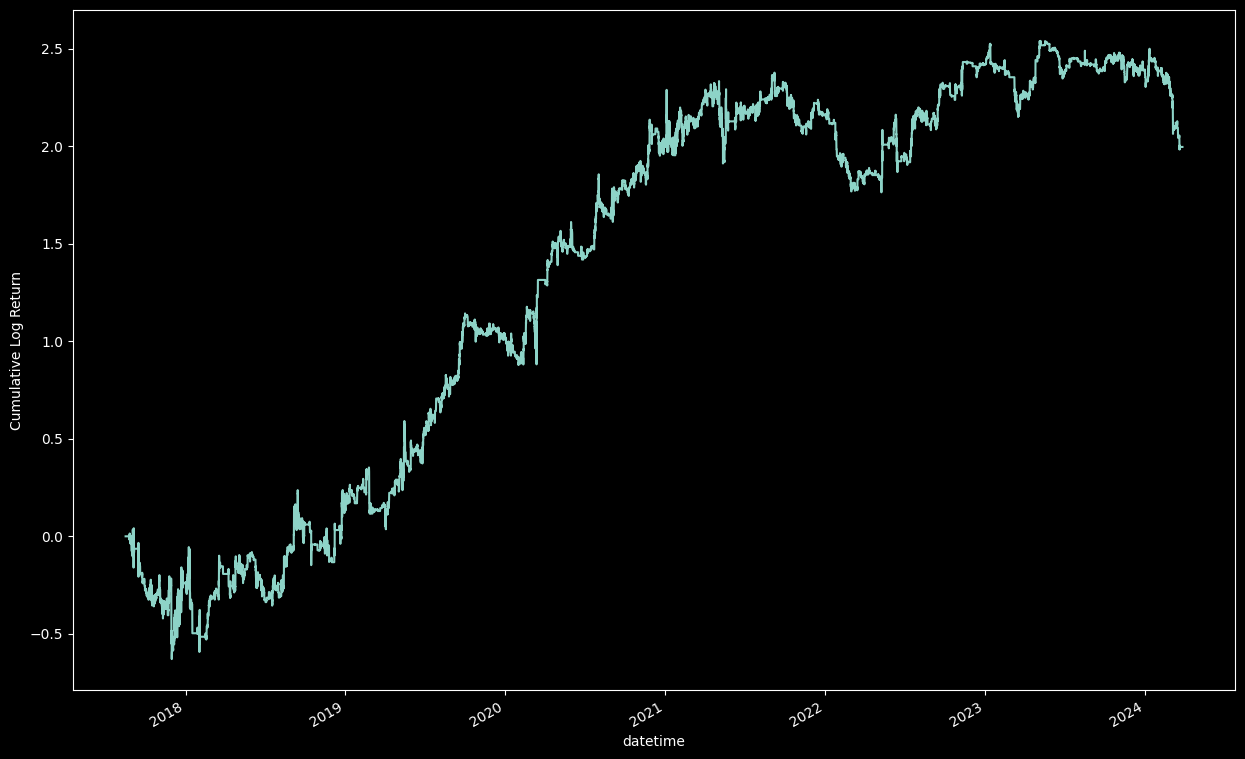

In [21]:

# from trades_from_signal import get_trades_from_signal
#
def get_trades_from_signal(data: pd.DataFrame, signal: np.array):
    # Gets trade entry and exit times from a signal
    # that has values of -1, 0, 1. Denoting short,flat,and long.
    # No position sizing.

    long_trades = []
    short_trades = []

    close_arr = data['close'].to_numpy()
    last_sig = 0.0
    open_trade = None
    idx = data.index
    for i in range(len(data)):
        if signal[i] == 1.0 and last_sig != 1.0: # Long entry
            if open_trade is not None:
                open_trade[2] = idx[i]
                open_trade[3] = close_arr[i]
                short_trades.append(open_trade)

            open_trade = [idx[i], close_arr[i], -1, np.nan]
        if signal[i] == -1.0  and last_sig != -1.0: # Short entry
            if open_trade is not None:
                open_trade[2] = idx[i]
                open_trade[3] = close_arr[i]
                long_trades.append(open_trade)

            open_trade = [idx[i], close_arr[i], -1, np.nan]

        if signal[i] == 0.0 and last_sig == -1.0: # Short exit
            open_trade[2] = idx[i]
            open_trade[3] = close_arr[i]
            short_trades.append(open_trade)
            open_trade = None

        if signal[i] == 0.0  and last_sig == 1.0: # Long exit
            open_trade[2] = idx[i]
            open_trade[3] = close_arr[i]
            long_trades.append(open_trade)
            open_trade = None

        last_sig = signal[i]

    long_trades = pd.DataFrame(long_trades, columns=['entry_time', 'entry_price', 'exit_time', 'exit_price'])
    short_trades = pd.DataFrame(short_trades, columns=['entry_time', 'entry_price', 'exit_time', 'exit_price'])

    long_trades['return'] = (long_trades['exit_price'] - long_trades['entry_price']) / long_trades['entry_price']
    short_trades['return'] = -1 * (short_trades['exit_price'] - short_trades['entry_price']) / short_trades['entry_price']
    long_trades = long_trades.set_index('entry_time')
    short_trades = short_trades.set_index('entry_time')

    long_trades['type'] = 1
    short_trades['type'] = -1
    all_trades = pd.concat([long_trades, short_trades])
    all_trades = all_trades.sort_index()

    return long_trades, short_trades, all_trades
    # return long_trades, short_trades, all_trades


def cmma(ohlc: pd.DataFrame, lookback: int, atr_lookback: int = 168):
    # cmma = Close minus moving average
    atr = ta.atr(ohlc['high'], ohlc['low'], ohlc['close'], atr_lookback)
    ma = ohlc['close'].rolling(lookback).mean()
    ind = (ohlc['close'] - ma) / (atr * lookback ** 0.5)
    # print(atr.dropna())
    # print(btc_cmma.dropna())
    return ind

def threshold_revert_signal(ind: pd.Series, threshold: float):
    # Outputs a 1 or -1 signal once the indicator goes above threshold or below -threshold
    # Outputs 0 again once the indicator returns to 0

    signal = np.zeros(len(ind))
    position = 0
    for i in range(len(ind)):
        if ind[i] > threshold:
            position = 1
        if ind[i] < -threshold:
            position = -1

        if position == 1 and ind[i] <= 0:
            position = 0

        if position == -1 and ind[i] >= 0:
            position = 0

        signal[i] = position

    return signal


if __name__ == '__main__':


    btc_data = df[df['ticker'] == 'BTCUSDT'].copy()
    btc_data['datetime'] = pd.to_datetime(btc_data['datetime'], format="mixed")
    btc_data = btc_data.set_index('datetime')
    btc_data = btc_data.dropna()
    
    eth_data = df[df['ticker'] == 'ETHUSDT'].copy()
    eth_data['datetime'] = pd.to_datetime(eth_data['datetime'], format="mixed")
    eth_data = eth_data.set_index('datetime')
    eth_data = eth_data.dropna()

    # Align both DataFrames to have the same index
    btc_data, eth_data = btc_data.align(eth_data, join='inner', axis=0)

    # Get log diff of eth and btc
    eth_data['diff'] = np.log(eth_data['close']).diff()
    btc_data['diff'] = np.log(btc_data['close']).diff()

    eth_data['next_return'] = eth_data['diff'].shift(-1)
    btc_data['next_return'] = btc_data['diff'].shift(-1)


    # lookback = 24
    # threshold = 0.25
    lookback = 9
    threshold = 0.3
    atr_lookback = 168
    btc_cmma = cmma(btc_data, lookback, atr_lookback)
    eth_cmma = cmma(eth_data, lookback, atr_lookback)

    intermarket_diff = eth_cmma - btc_cmma

    eth_data['sig'] = threshold_revert_signal(intermarket_diff, threshold)
    # print(btc_data.head())

    # print(btc_cmma.dropna())

    plt.figure(figsize=(15, 10))  # You can adjust the numbers to fit your specific needs
    plt.style.use('dark_background')
    rets = eth_data['sig'] * eth_data['next_return']
    pf = rets[rets > 0].sum() / rets[rets<0].abs().sum()
    pf = rets[rets > 0].sum() / rets[rets<0].abs().sum()
    print("Profit factor", pf)
    rets.cumsum().plot()
    plt.ylabel("Cumulative Log Return")



    long_trades, short_trades, all_trades = get_trades_from_signal(eth_data, eth_data['sig'])

    long_tr = long_trades['return']
    short_tr = short_trades['return']

    print("long trades")
    print("# of trades", len(long_tr))
    print("win rate", len(long_tr[long_tr > 0]) / len(long_tr) )
    print("avg trade %", long_tr.mean() * 100)
    print("")
    print("short trades")
    print("# of trades", len(short_tr))
    print("win rate", len(short_tr[short_tr > 0]) / len(short_tr) )
    print("avg trade %", short_tr.mean() * 100)

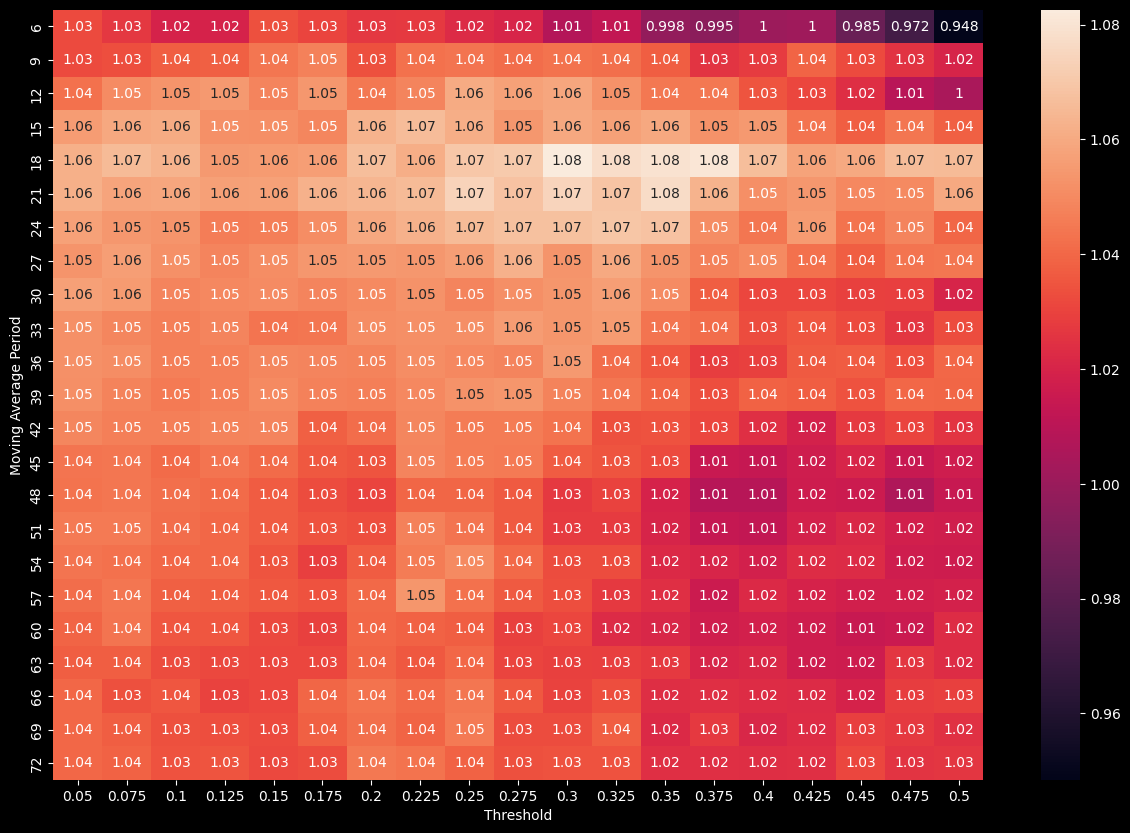

In [16]:
    pf_df = pd.DataFrame()
    for lookback in range(6, 73, 3):
        for threshold in np.linspace(0.05, 0.5, 19):
            atr_lookback = 168
            btc_cmma = cmma(btc_data, lookback, atr_lookback)
            eth_cmma = cmma(eth_data, lookback, atr_lookback)

            intermarket_diff = eth_cmma - btc_cmma

            eth_data['sig'] = threshold_revert_signal(intermarket_diff, threshold)

            rets = eth_data['sig'] * eth_data['next_return']

            pf = rets[rets > 0].sum() / rets[rets<0].abs().sum()
            # print(lookback, threshold, pf)
            pf_df.loc[lookback, round(threshold, 3)] = pf

    plt.figure(figsize=(15, 10))  # You can adjust the numbers to fit your specific needs
    plt.style.use('dark_background')
    import seaborn as sns
    sns.heatmap(pf_df, annot=True, fmt='0.3g')
    plt.xlabel('Threshold')
    plt.ylabel('Moving Average Period')
    plt.show()